In [34]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [24]:
# load data
data = pd.read_csv('../data/559-full.csv')


In [25]:
# cleanup data
data = data.dropna()
# data = data.drop(['timestamp'], axis=1)


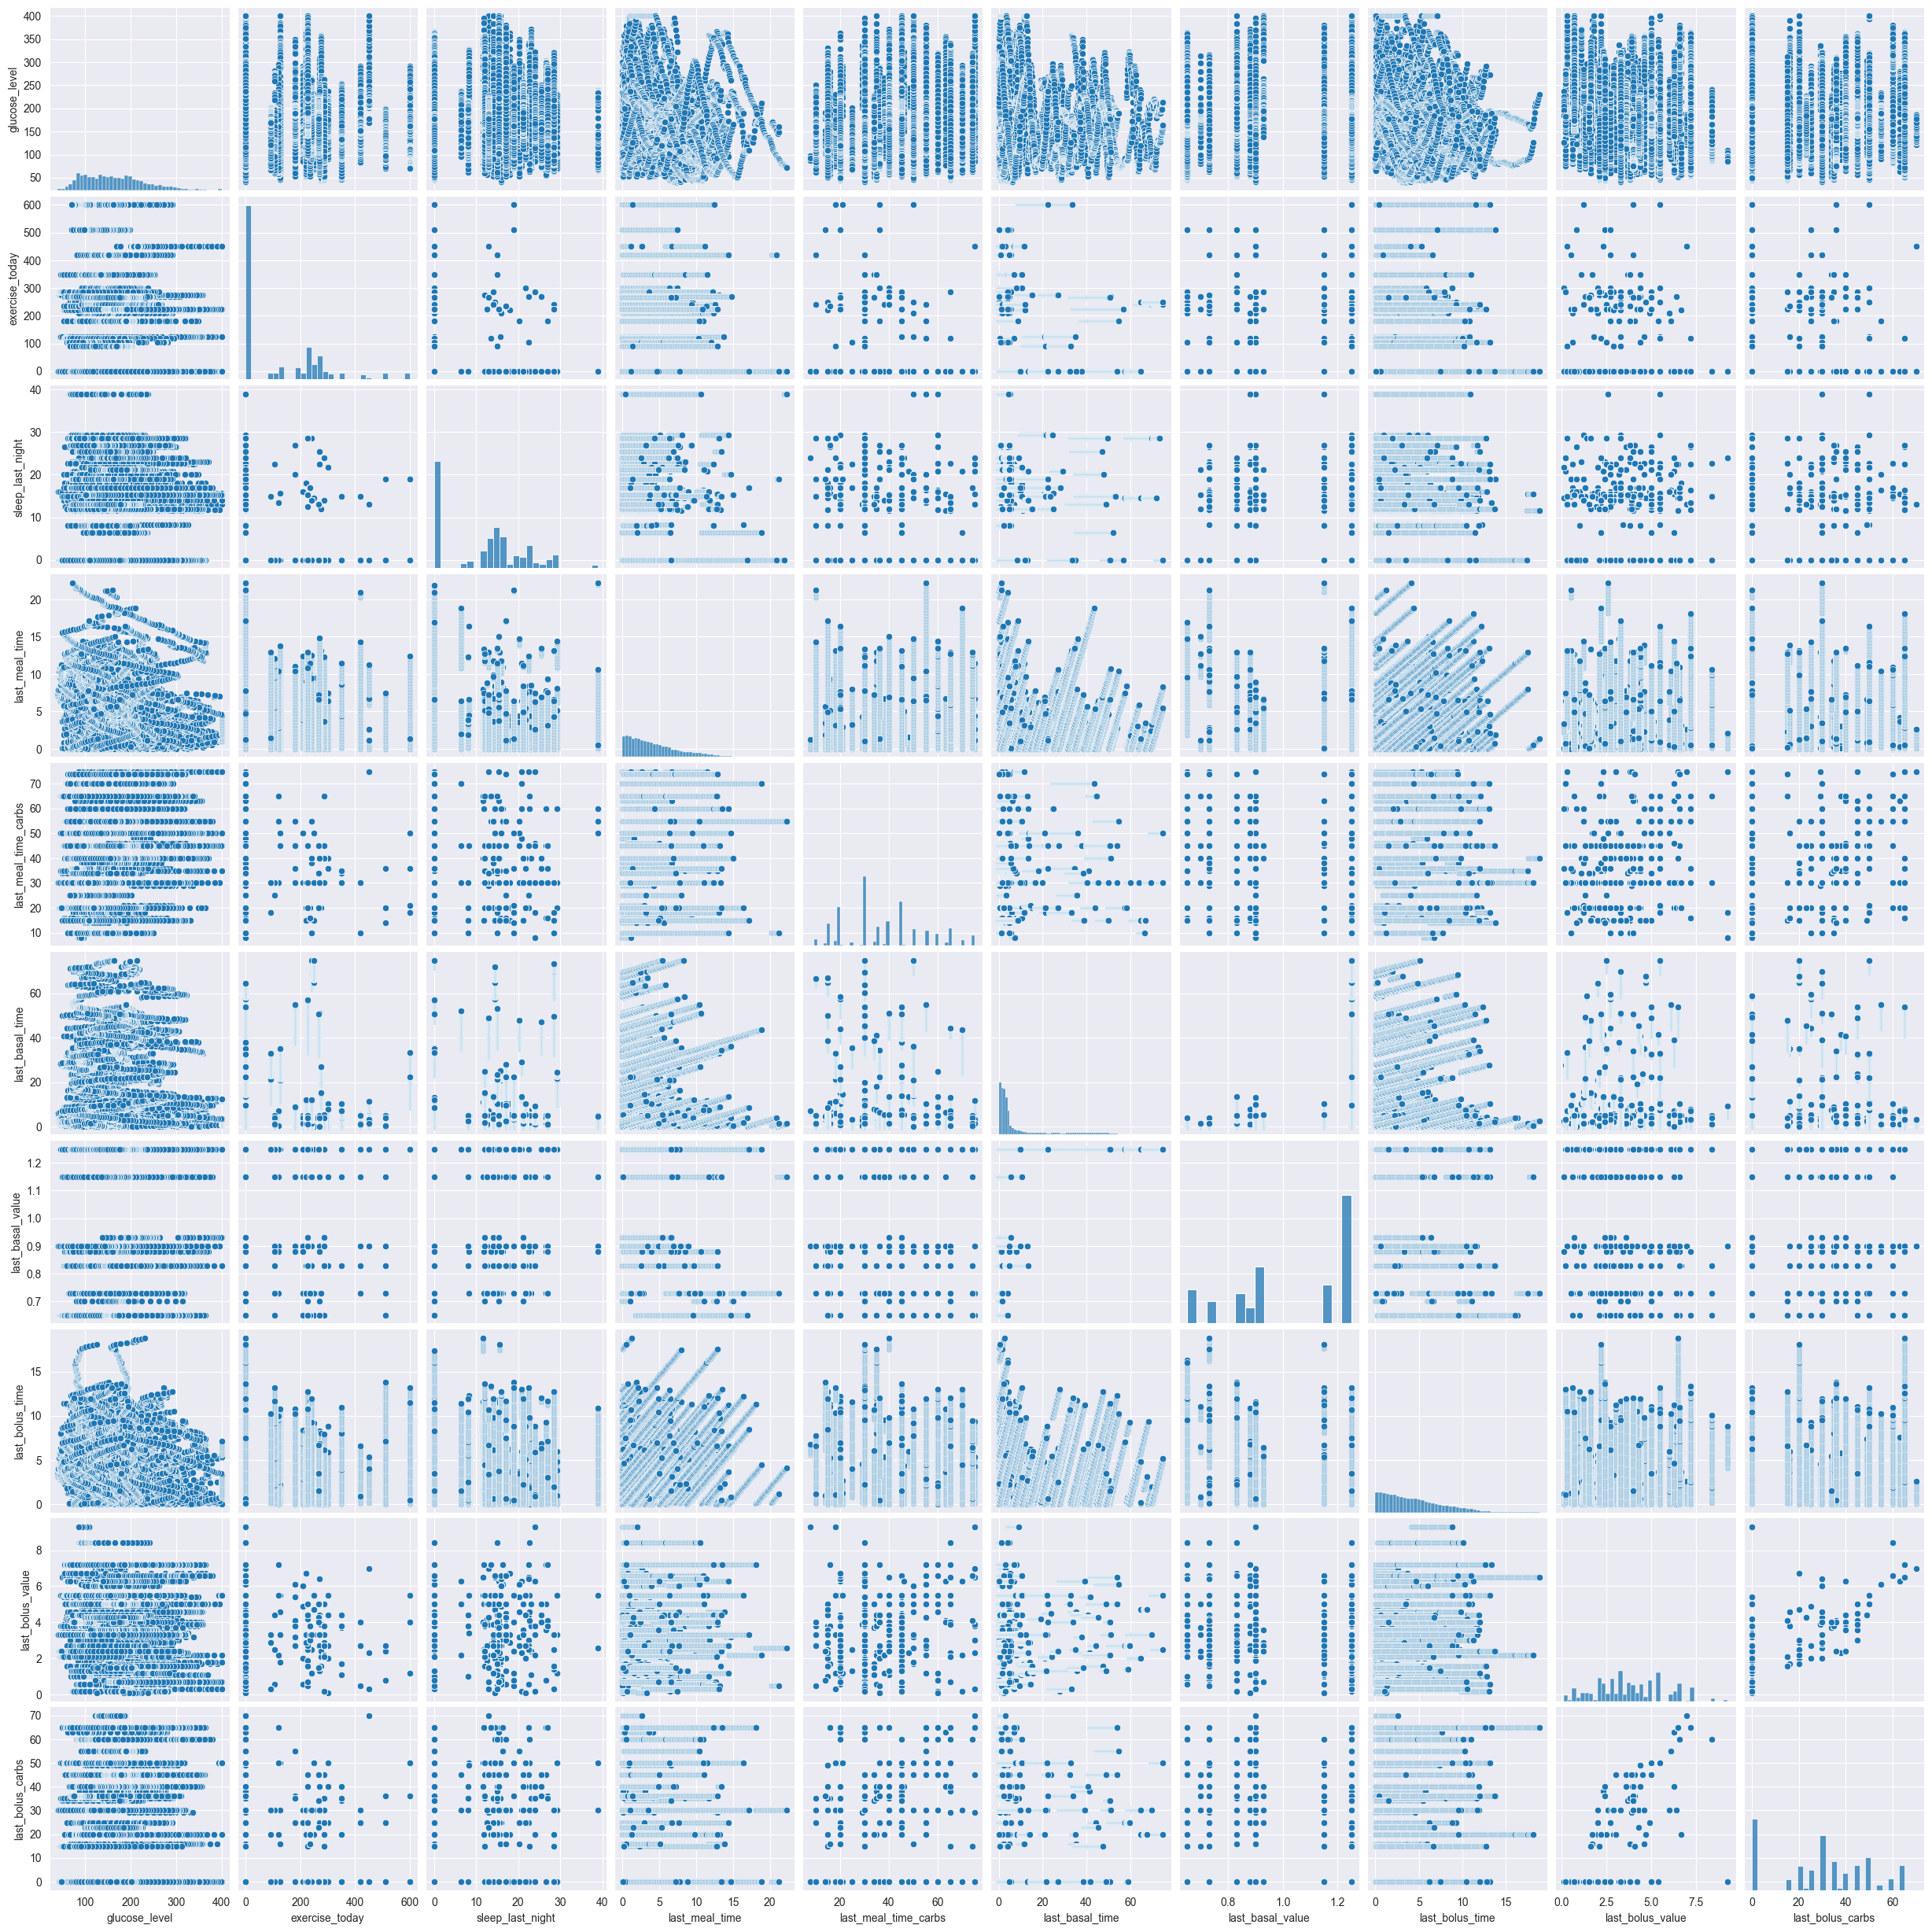

In [26]:
# plot data
sns.pairplot(data)
plt.show()


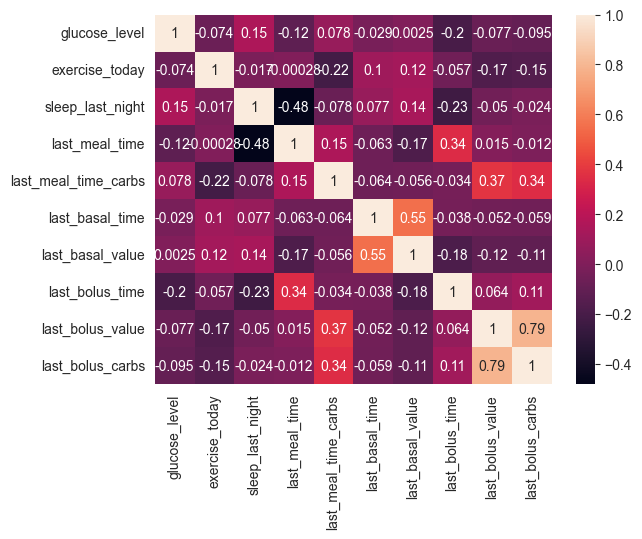

In [11]:
# plot data
sns.heatmap(data.corr(), annot=True)
plt.show()


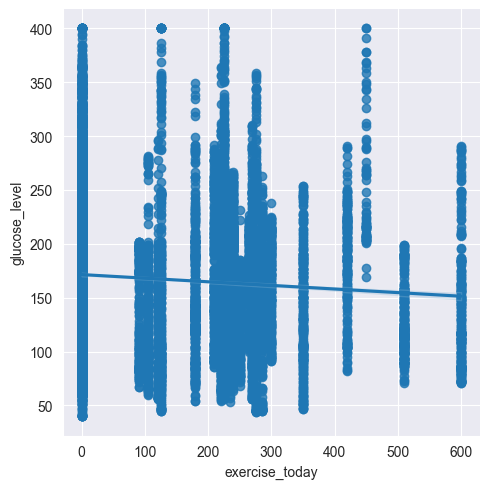

In [23]:
# plot to show the relationship between glucose level and exercise_today
sns.lmplot(x='exercise_today', y='glucose_level', data=data)
plt.show()

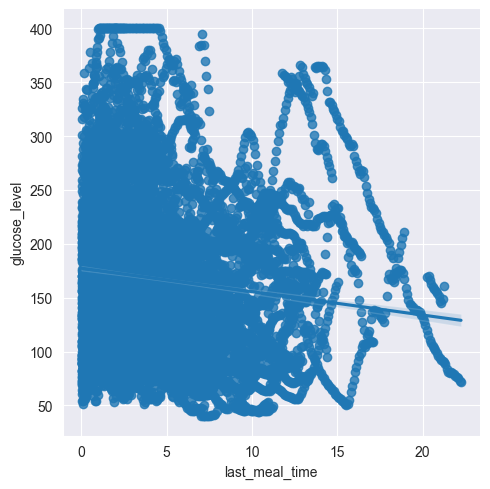

In [22]:
# plot to show the relationship between glucose level and last_meal_time
sns.lmplot(x='last_meal_time', y='glucose_level', data=data)
plt.show()

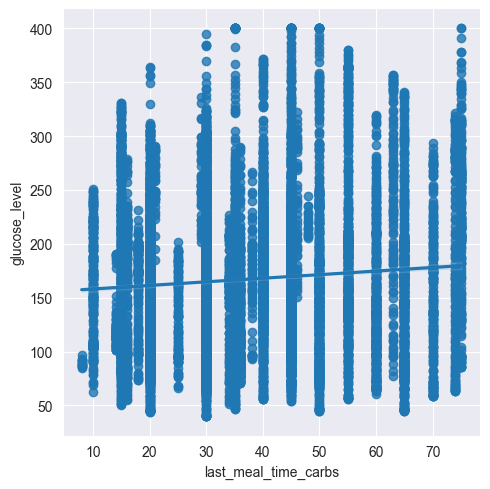

In [21]:
# plot to show the relationship between glucose level and last_meal_time_carbs
sns.lmplot(x='last_meal_time_carbs', y='glucose_level', data=data)
plt.show()

In [39]:
# a vércukorszint alakulása a felkelés után
# find the rows where the value of the sleep_last_night column turns from 0 to something and put it into a dataframe

# Shift the 'sleep_last_night' column by one period
data['sleep_last_night_shifted'] = data['sleep_last_night'].shift(1)

# Find where the value changes from 0 to a non-zero value
mask = (data['sleep_last_night_shifted'] == 0) & (data['sleep_last_night'] != 0)

# Filter the original DataFrame
new_data = data[mask]

# Drop the shifted column as it's no longer needed
new_data = new_data.drop('sleep_last_night_shifted', axis=1)

# modify the timestamp column so that it is in date format
# Convert the 'timestamp' column to just date format
# Convert the 'timestamp' column to datetime format
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])

# Remove the time part
new_data['timestamp'] = new_data['timestamp'].dt.date

new_data.tail()


timestamp  glucose_level  exercise_today  sleep_last_night  \
11888  2022-01-22            112             600         19.000000   
12150  2022-01-23             72               0         25.500000   
12407  2022-01-24            161               0         15.333333   
12693  2022-01-25            193               0         21.250000   
12967  2022-01-26            109               0         17.000000   

       last_meal_time  last_meal_time_carbs  last_basal_time  \
11888        0.700000                  18.0         8.950000   
12150       12.533333                  36.0        33.533333   
12407       14.950000                  40.0         0.200000   
12693       10.950000                  30.0         1.283333   
12967       17.033333                  15.0         8.533333   

       last_basal_value  last_bolus_time  last_bolus_value  last_bolus_carbs  
11888              1.25        11.740556               5.5              50.0  
12150              1.25        11.582222               4.0              36.0  
12407              0.70         6.059167               3.3              30.0  
12693              0.70        10.895833               5.0              45.0  
12967              1.25         8.350833               3.3              30.0

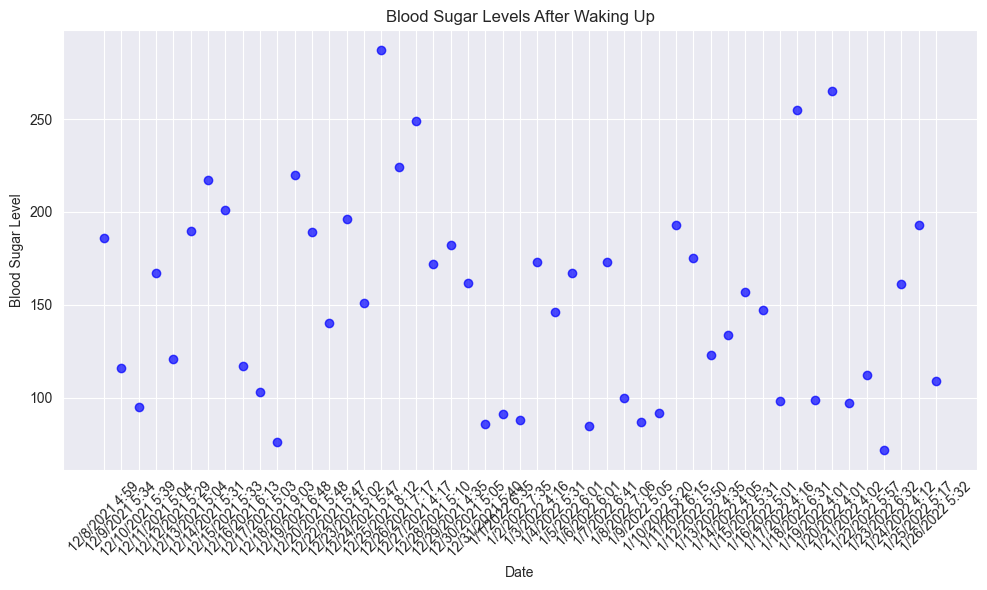

In [32]:
# plot the glucose level after waking up
plt.figure(figsize=(10, 6))
plt.scatter(new_data['timestamp'], new_data['glucose_level'], color='blue', alpha=0.7)
plt.title('Blood Sugar Levels After Waking Up')
plt.xlabel('Date')
plt.ylabel('Blood Sugar Level')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# candle stick plot
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=new_data['timestamp'],
                open=new_data['glucose_level'],
                high=new_data['glucose_level'],
                low=new_data['glucose_level'],
                close=new_data['glucose_level'])])

fig.show()
